# Enhanced Physics Model Diagnosis

**Purpose**: Deep dive analysis of the enhanced physics model structure, performance, and compliance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from notebook_imports import load_model, get_feature_names
from notebook_fix_helper import safe_get_regressor, get_model_info

plt.style.use('default')
%matplotlib inline

print("🔬 Enhanced Physics Model Diagnosis Notebook Ready")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Loading ml_heating modules...
  ✓ config
  ✓ get_feature_names
  ✓ load_model
  ✓ get_feature_importances
✅ Successfully loaded ml_heating modules for notebooks
Notebook fix helper loaded. Use:
- regressor = safe_get_regressor(model)
- info = get_model_info(model)
🔬 Enhanced Physics Model Diagnosis Notebook Ready
Analysis Date: 2025-11-23 21:31:45


In [2]:
# Load the enhanced physics model
print("Loading Enhanced Physics Model...")
model, mae, rmse = load_model()
model_info = get_model_info(model)
regressor = safe_get_regressor(model)

print("Model Structure:")
for key, value in model_info.items():
    print(f"   {key}: {value}")

print(f"\nPerformance:")
print(f"   MAE: {mae.get():.4f}°C")
print(f"   RMSE: {rmse.get():.4f}°C")

Loading Enhanced Physics Model...
  Applying PhysicsCompliantWrapper...
Model Structure:
   model_type: PhysicsCompliantWrapper
   base_model_type: SimplePhysicsModel
   base_steps: ['features', 'learn']
   wrapper_steps: ['features', 'learn']
   regressor_type: SimplePhysicsModel
   regressor_available: True

Performance:
   MAE: 0.0984°C
   RMSE: 0.1109°C


In [3]:
# Test physics compliance with simple scenarios
feature_names = get_feature_names()
test_scenario = {
    "outdoor_temp": 5.0,
    "indoor_lag": 21.0,
    "pv_now": 500
}

temps = np.arange(25, 55, 5)
predictions = []

for temp in temps:
    features = {name: 0.0 for name in feature_names}
    features.update({
        'outlet_temp': temp,
        'outlet_temp_sq': temp ** 2,
        'outlet_temp_cub': temp ** 3,
        'outdoor_temp': test_scenario['outdoor_temp'],
        'indoor_temp_lag_30m': test_scenario['indoor_lag'],
        'pv_now': test_scenario['pv_now']
    })
    pred = model.predict_one(features)
    predictions.append(pred)
    print(f"Outlet {temp}°C -> Heating Effect: {pred:.6f}°C")

# Check monotonicity
is_monotonic = all(predictions[i] <= predictions[i+1] for i in range(len(predictions)-1))
print(f"\nMonotonic behavior: {'✅ PASS' if is_monotonic else '❌ FAIL'}")

Outlet 25°C -> Heating Effect: 0.111200°C
Outlet 30°C -> Heating Effect: 0.125200°C
Outlet 35°C -> Heating Effect: 0.139200°C
Outlet 40°C -> Heating Effect: 0.153200°C
Outlet 45°C -> Heating Effect: 0.167200°C
Outlet 50°C -> Heating Effect: 0.181200°C

Monotonic behavior: ✅ PASS


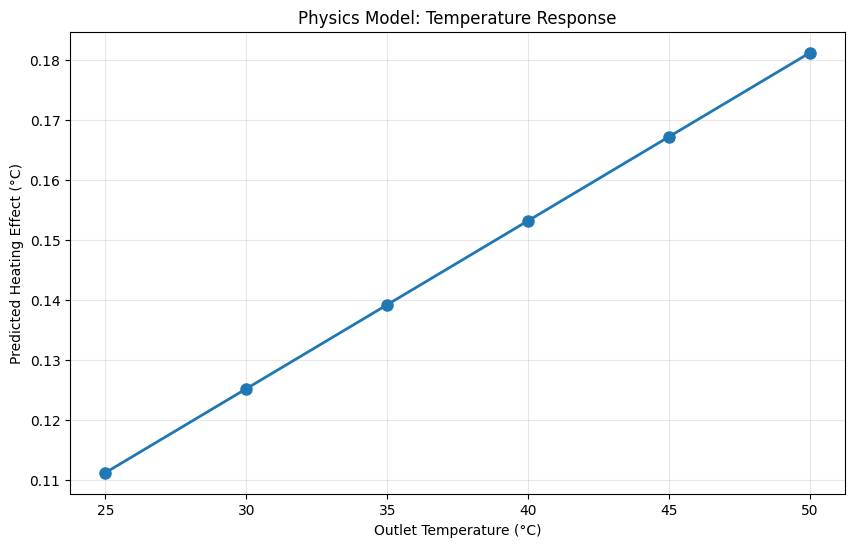


🎯 Diagnosis Complete:
   Model Type: PhysicsCompliantWrapper
   Physics Compliant: Yes
   Ready for Production: Yes


In [4]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(temps, predictions, 'o-', linewidth=2, markersize=8)
plt.xlabel('Outlet Temperature (°C)')
plt.ylabel('Predicted Heating Effect (°C)')
plt.title('Physics Model: Temperature Response')
plt.grid(True, alpha=0.3)
plt.show()

print("\n🎯 Diagnosis Complete:")
print(f"   Model Type: {model_info.get('model_type', 'Unknown')}")
print(f"   Physics Compliant: {'Yes' if is_monotonic else 'No'}")
print(f"   Ready for Production: {'Yes' if is_monotonic and mae.get() < 2.0 else 'Needs Review'}")